In [1]:
import requests

scores = {}
for week in range(1, 17):
    r = requests.get('http://games.espn.com/ffl/api/v2/scoreboard', 
                     params={'leagueId': 1507773, 'seasonId': 2018, 'matchupPeriodId': week})
    scores[week] = r.json()

In [2]:
df = []
for key in scores:
    temp = scores[key]['scoreboard']['matchups']
    for match in temp:
        df.append([key, 
                   match['teams'][0]['team']['teamAbbrev'],
                   match['teams'][1]['team']['teamAbbrev'],
                   match['teams'][0]['score'],
                   match['teams'][1]['score']])

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.DataFrame(df, columns=['Week', 'HomeAbbrev', 'AwayAbbrev', 'HomeScore', 'AwayScore'])
df.head()

,Week,HomeAbbrev,AwayAbbrev,HomeScore,AwayScore
0,1,BY,HAMA,124.74,60.84
1,1,NISH,DOMZ,85.32,81.48
2,1,PASC,VUDU,71.32,73.74
3,1,CABE,PUN,113.46,77.34
4,1,***,Arch,79.10,108.86


In [5]:
df = (df[['Week', 'HomeAbbrev', 'HomeScore']]
      .rename(columns={'HomeAbbrev': 'Abbrev', 'HomeScore': 'Score'})
      .append(df[['Week', 'AwayAbbrev', 'AwayScore']]
      .rename(columns={'AwayAbbrev': 'Abbrev', 'AwayScore': 'Score'}))
     )
df['Type'] = pd.Series(['Regular' if w<=13 else 'Playoff' for w in df['Week']])

In [6]:
df

,Week,Abbrev,Score,Type
0,1,BY,124.74,Regular
1,1,NISH,85.32,Regular
2,1,PASC,71.32,Regular
3,1,CABE,113.46,Regular
4,1,***,79.10,Regular
5,2,DOMZ,123.16,Regular
6,2,PUN,76.70,Regular
7,2,Arch,99.12,Regular
8,2,CABE,93.26,Regular
9,2,***,94.78,Regular


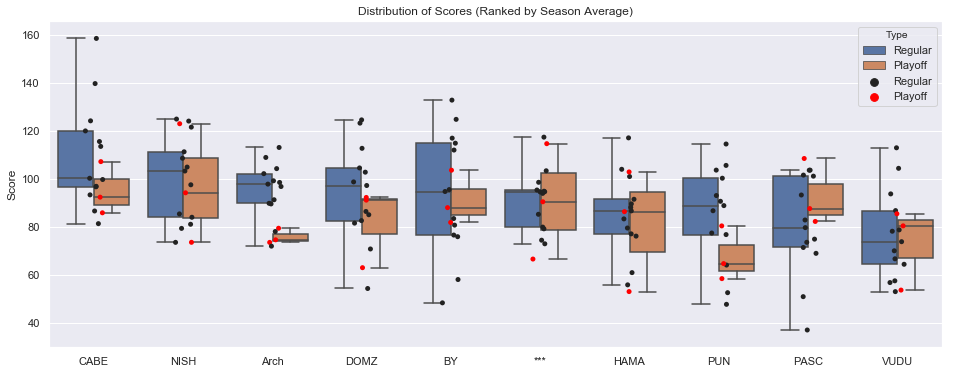

In [11]:
fig, ax = plt.subplots(1,1, figsize=(16,6))

order = df.loc[df['Type']=='Regular'].groupby(by=["Abbrev"])["Score"].sum().sort_values().iloc[::-1].index

sns.set(style="darkgrid")
sns.boxplot(x='Abbrev', y='Score', hue='Type', data=df, order=order, whis=2.0)
sns.stripplot(x='Abbrev', y='Score', hue='Type', data=df, order=order, jitter=True, color="red", linewidth=0)
ax.set_xlabel('')
ax.set_title('Distribution of Scores (Ranked by Season Average)')
plt.show()

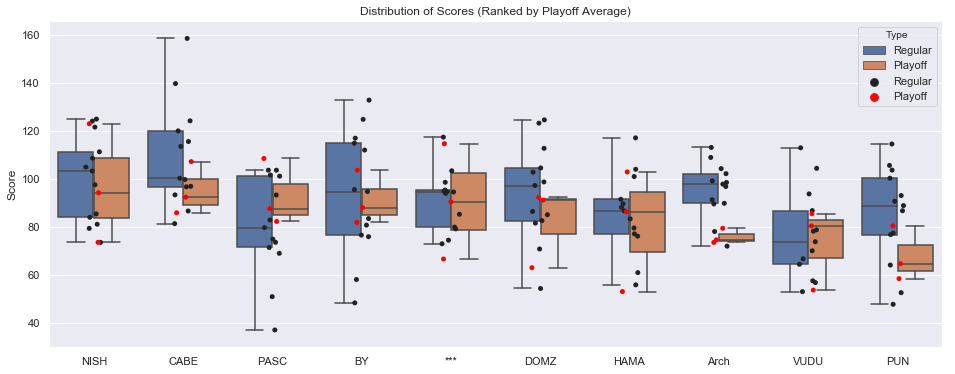

In [8]:
fig, ax = plt.subplots(1,1, figsize=(16,6))

order = df.loc[df['Type']=='Playoff'].groupby(by=["Abbrev"])["Score"].sum().sort_values().iloc[::-1].index

sns.set(style="darkgrid")
sns.boxplot(x='Abbrev', y='Score', hue='Type', data=df, order=order, whis=2.0)
sns.stripplot(x='Abbrev', y='Score', hue='Type', data=df, order=order, jitter=True, color="red", linewidth=0)
ax.set_xlabel('')
ax.set_title('Distribution of Scores (Ranked by Playoff Average)')
plt.show()

In [9]:
order = df.groupby(by=["Abbrev"])["Score"].sum().sort_values()
print(order)

Abbrev
VUDU    1215.24
PUN     1304.16
PASC    1319.60
HAMA    1351.72
***     1454.88
Arch    1467.82
DOMZ    1469.74
BY      1487.04
NISH    1589.12
CABE    1710.68
Name: Score, dtype: float64


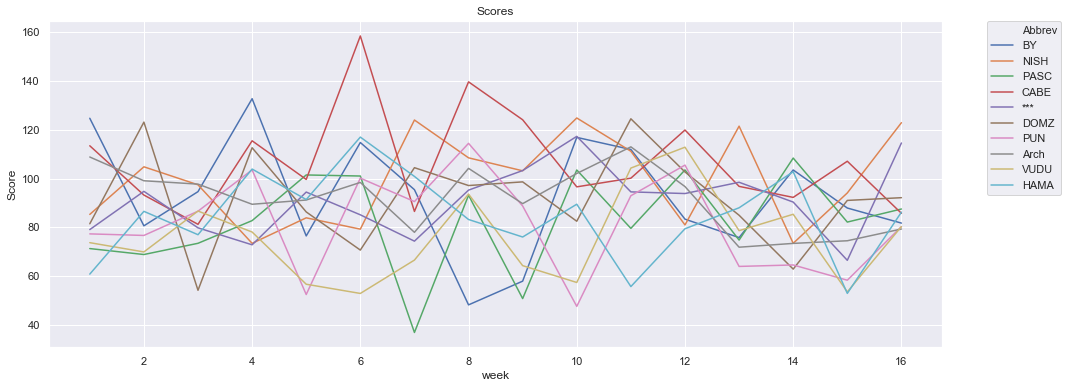

In [10]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
sns.lineplot(x='Week', y='Score', data= df, hue="Abbrev")
ax.set_xlabel('week')
ax.set_title('Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()